In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("news.csv")
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [4]:
count=df.groupby('label',sort=False).size()
count

label
FAKE    3164
REAL    3171
dtype: int64

In [5]:
lab=df['label'].unique()
lab

array(['FAKE', 'REAL'], dtype=object)

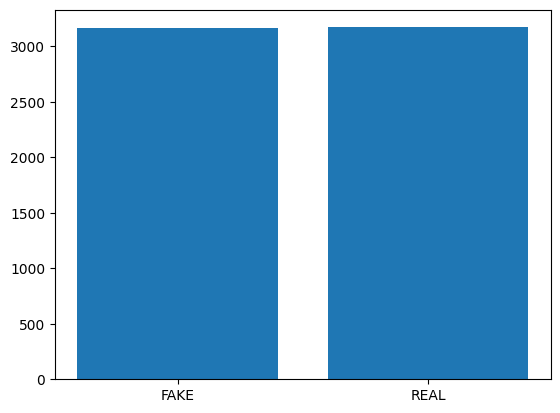

In [6]:
#BAR GRAPH
plt.bar(lab,count)
plt.show()

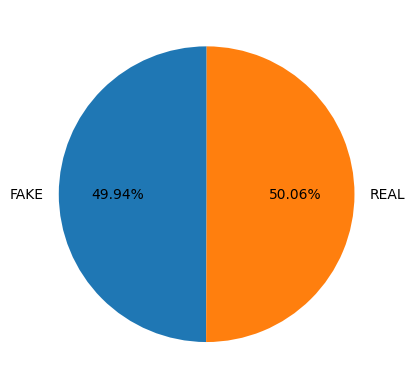

In [7]:
#PIE CHART
plt.pie(count,labels=lab,startangle=90,autopct='%1.2f%%')
plt.show()

In [8]:
df.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [9]:
x=df['text'].values
y=df['label'].values

In [10]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0) 

In [13]:

x_train.shape

(4751,)

In [14]:
x_test.shape

(1584,)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test) 

In [16]:
# Method-1 SVC (support vector classifier)
from sklearn.svm import SVC
model1=SVC()


In [17]:
model1.fit(x_train_vect,y_train)

SVC()

In [18]:
y_pred1 = model1.predict(x_test_vect)
y_pred1 #predicted value

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'],
      shape=(1584,), dtype=object)

In [19]:
y_test #actual data

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'],
      shape=(1584,), dtype=object)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.8642676767676768

In [21]:
#METHOD 2(Naive Bayes classifier)
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()

In [22]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [23]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array(['REAL', 'REAL', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'],
      shape=(1584,), dtype='<U4')

In [24]:
y_test

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'],
      shape=(1584,), dtype=object)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test) #highest accuracy

0.8819444444444444


MODEL-2 HAS THE HIGHEST ACCURACY SCORE

In [ ]:
#SERIALIZATION
import joblib
joblib.dump(model3,'spam fighter')

['spam fighter']

In [35]:
joblib.dump(vect,'Vectorizer')

['Vectorizer']

Predicting the newly entered piece of text

In [36]:
msg=["free gifts worth 100 million"] 
msg_transformed = vect.transform(msg)
text_model.predict(msg_transformed)

array(['FAKE'], dtype='<U4')

In [37]:
msg2=["The State Department told the Republican Natio..."]
msg2_transformed = vect.transform(msg2)
text_model.predict(msg2_transformed)

array(['REAL'], dtype='<U4')

 CREATING A WEB APP


In [30]:
import streamlit as st

In [38]:
%%writefile app.py
import streamlit as st
import joblib

text_model = joblib.load("spam fighter")
vectorizer = joblib.load("Vectorizer")

st.title("SPAM FILTER")

ip = st.text_input("Enter the message :")  
   
if st.button('PREDICT'):
    if ip.strip() == "":
        st.warning("Please enter a message.")
    else:
        # Vectorize the input
        ip_vec = vectorizer.transform([ip])
        
        # Predict
        op = text_model.predict(ip_vec)
        
        # Show result
        st.title(op[0])                            

Overwriting app.py
